# Uber Fare

# EDA

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv('uber.csv')
df1 = df.copy()
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [86]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1)

In [87]:
df.shape

(200000, 7)

## Datatypes of the data in columns

In [88]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


## Checking for null values

In [90]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [91]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,200000.0,11.359955,9.901776,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,200000.0,-72.527638,11.437787,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,200000.0,39.935885,7.720539,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,-72.525292,13.117408,-3356.666300,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,39.923890,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,200000.0,1.684535,1.385997,0.000000,1.000000,1.000000,2.000000,208.000000


## Minimum fare per ride

In [92]:
df.fare_amount.min()

-52.0

## Maximum fare per ride

In [117]:
df.fare_amount.max()

22.25

## Filling null values with median

In [93]:
mdfill = lambda x : x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(mdfill, axis = 0)

## Checking for outliers

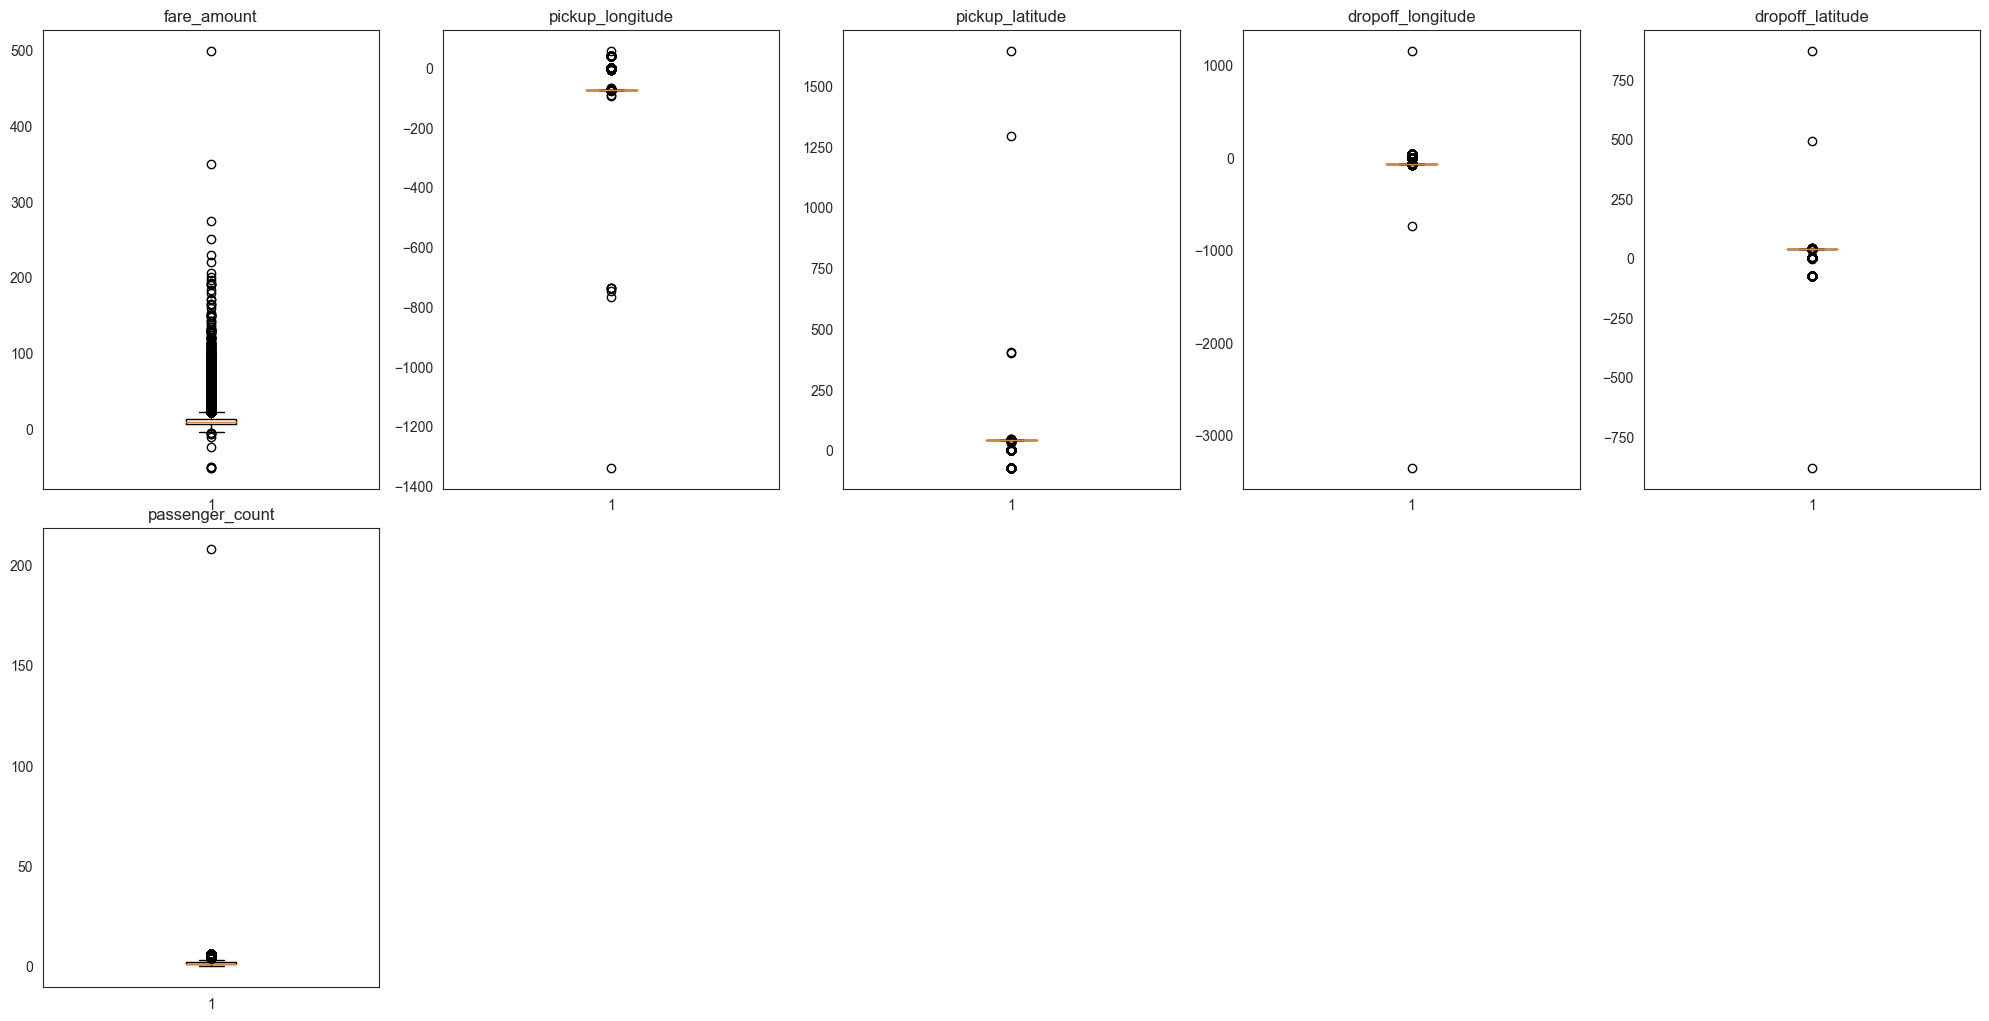

In [94]:
plt.figure(figsize =(20, 30))

for i , variable in enumerate(numeric_columns):
    plt.subplot(6 , 5, i +1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [95]:
df = df.loc[(df.fare_amount >= 0)]

In [96]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [97]:
df = df.drop('pickup_datetime',axis=1)

## Removing outliers

In [98]:
df = treat_outliers_all(df , df.iloc[: , 0::])

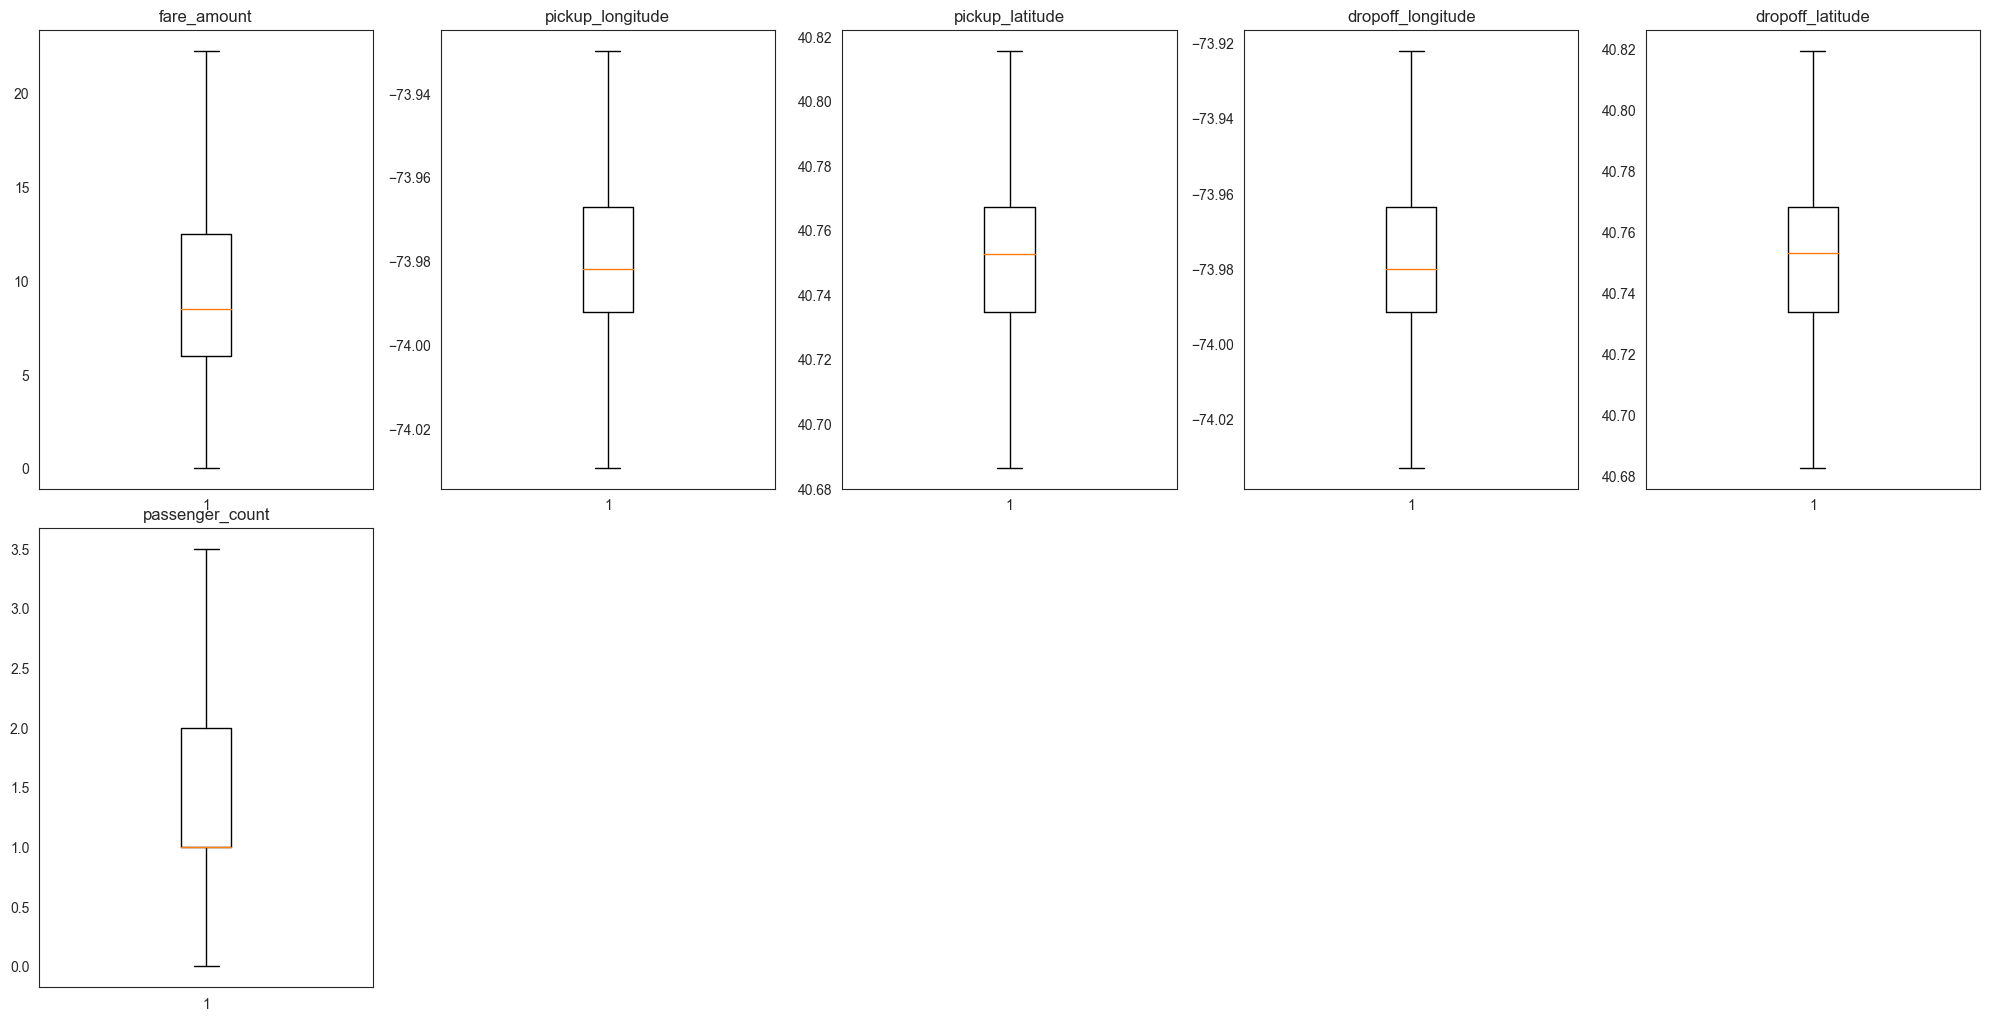

In [99]:
plt.figure(figsize=(20,30))
for i , variable in enumerate(df.iloc[: , 0::]):
    plt.subplot(6,5,i+1)
    plt.boxplot(df[variable] , whis = 1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [100]:
df.shape

(199983, 6)

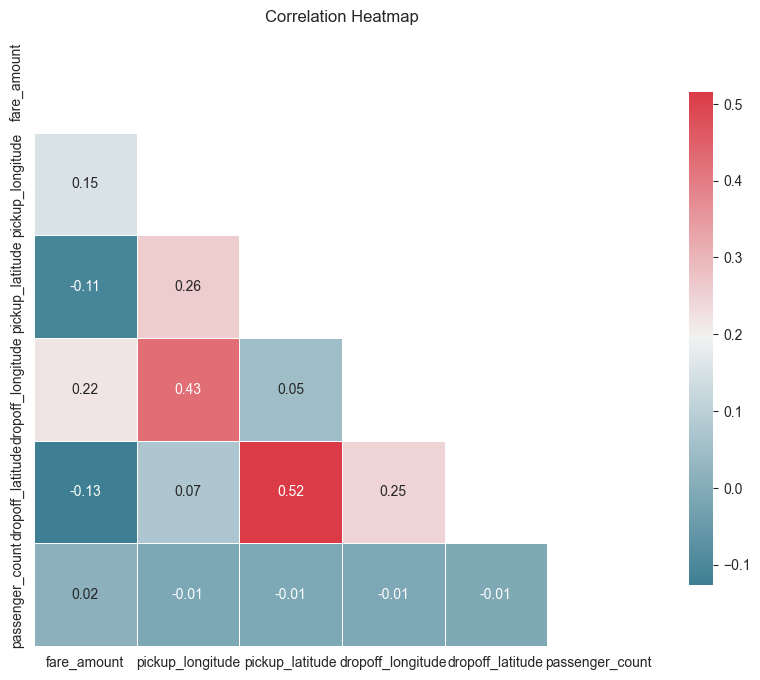

In [101]:
import seaborn as sns

def correlation_heatmap(dataframe):
    corr_matrix = dataframe.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    plt.figure(figsize=(10, 8))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f",
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

    plt.title("Correlation Heatmap")
    plt.show()
correlation_heatmap(df)

## Calculating distance using pickup and drop latitude and longitude

In [102]:
from math import *
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []

    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)

    return travel_dist

In [103]:
df1['dist_travel_km'] = distance_transform(df1['pickup_longitude'].to_numpy(),
                                                df1['pickup_latitude'].to_numpy(),
                                                df1['dropoff_longitude'].to_numpy(),
                                                df1['dropoff_latitude'].to_numpy()
                                              )

In [104]:
df1 = df1.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)

In [105]:
df1.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,passenger_count,dist_travel_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,1,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,1,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,1,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,3,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,5,4.475450


## Turning the string pickup date and time into something we can use

In [106]:
df1['pickup_datetime'] = pd.to_datetime(df1['pickup_datetime'])

# Extract year, month, day, and hour into separate columns
df1['year'] = df1['pickup_datetime'].dt.year
df1['month'] = df1['pickup_datetime'].dt.month
df1['day'] = df1['pickup_datetime'].dt.day
df1['hour'] = df1['pickup_datetime'].dt.hour
df1.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,passenger_count,dist_travel_km,year,month,day,hour
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,1,1.683323,2015,5,7,19
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,1,2.457590,2009,7,17,20
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,1,5.036377,2009,8,24,21
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,3,1.661683,2009,6,26,8
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,5,4.475450,2014,8,28,17


In [107]:
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1.head()

,key,fare_amount,pickup_datetime,passenger_count,dist_travel_km,year,month,day,hour
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,1,1.683323,2015,5,7,19
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,1,2.457590,2009,7,17,20
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,1,5.036377,2009,8,24,21
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,3,1.661683,2009,6,26,8
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,5,4.475450,2014,8,28,17


In [108]:
df1.drop('key',axis=1,inplace=True)

In [109]:
df1.head()

,fare_amount,pickup_datetime,passenger_count,dist_travel_km,year,month,day,hour
0,7.5,2015-05-07 19:52:06+00:00,1,1.683323,2015,5,7,19
1,7.7,2009-07-17 20:04:56+00:00,1,2.457590,2009,7,17,20
2,12.9,2009-08-24 21:45:00+00:00,1,5.036377,2009,8,24,21
3,5.3,2009-06-26 08:22:21+00:00,3,1.661683,2009,6,26,8
4,16.0,2014-08-28 17:47:00+00:00,5,4.475450,2014,8,28,17


## Total passengers per month

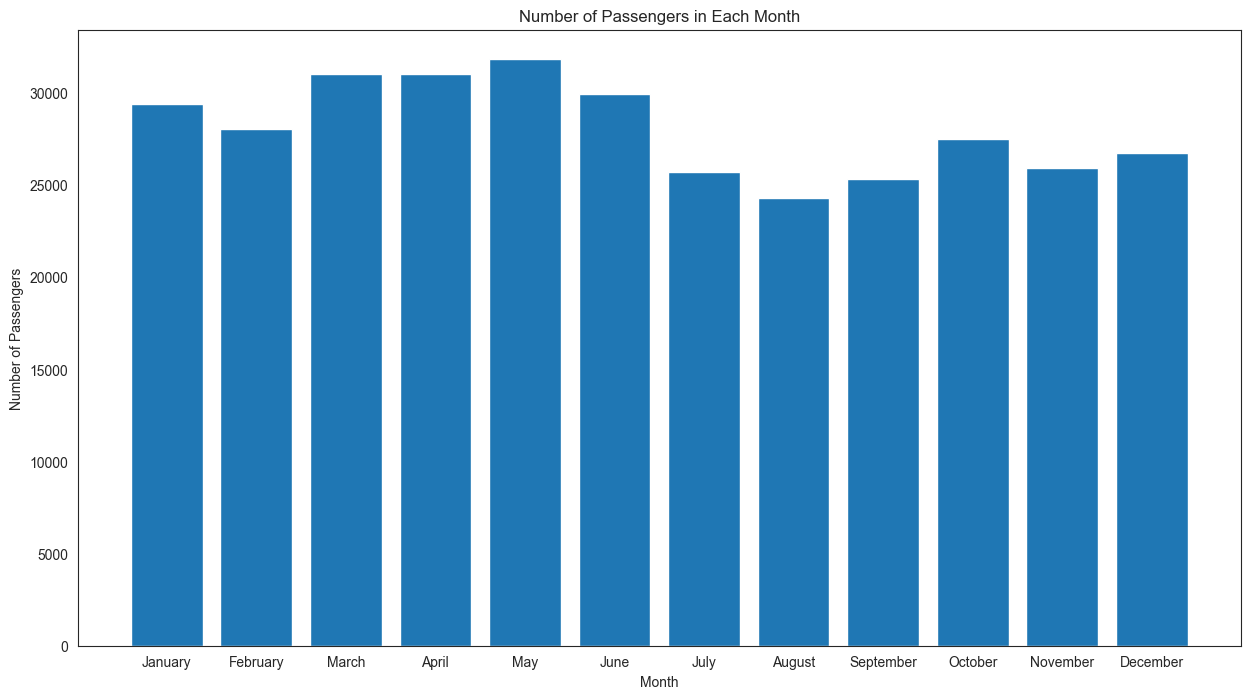

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Assuming you have a DataFrame called 'df' containing the data
# with columns 'month' and 'passenger count'

# Group the data by month and calculate the total number of passengers in each month
passenger_counts = df1.groupby('month')['passenger_count'].sum()

# Convert the month index to month names
passenger_counts.index = passenger_counts.index.map(lambda x: calendar.month_name[x])
plt.figure(figsize=(15, 8))  # Adjust the values as per your requirement

# Create a bar chart using matplotlib
plt.bar(passenger_counts.index, passenger_counts.values)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers in Each Month')
# Show the plot
plt.show()


#### Seems like people used Uber rides in May the most and dont really use it in August

## Total passengers of Uber over the years

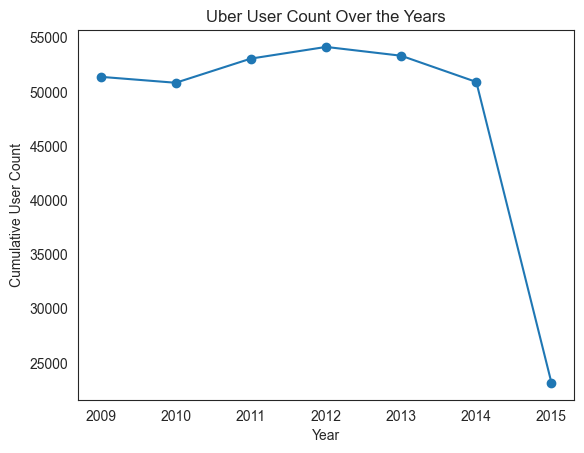

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' containing the data
# with columns 'year', 'month', 'day', and 'passenger_count'

# Group the data by year and month and calculate the total number of passengers in each month
passenger_counts = df1.groupby(['year'])['passenger_count'].sum().reset_index()

# Calculate the cumulative sum of passenger counts over the months for each year
passenger_counts['cumulative_count'] = passenger_counts.groupby('year')['passenger_count'].cumsum()

# Create a line chart to visualize the cumulative user count over the years
plt.plot(passenger_counts['year'], passenger_counts['cumulative_count'], marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Cumulative User Count')
plt.title('Uber User Count Over the Years')

# Show the plot
plt.show()



#### As there isnt much data of 2015 the user count in 2015 dropped